In [1]:
import pandas as pd

In [2]:
TRAIN_SIZE = 1000
DEVICE = "eyeriss" # eyeriss, edgegpu, fpga
MODEL = "DTREE"  # XGBRegressor, DTREE

In [3]:
df_x = pd.read_csv("mydata/zero_cost_proxies.csv", index_col=0)

In [4]:
df_y = pd.read_csv("mydata/hw_energy.csv", index_col=0)

In [5]:
df = pd.merge(df_x, df_y, left_index=True, right_index=True)
df

,epe_nas,fisher,flops,grad_norm,grasp,jacov,l2_norm,nwot,params,plain,snip,synflow,zen,eyeriss_energy,edgegpu_energy,fpga_energy
|avg_pool_3x3~0|+|skip_connect~0|none~1|+|nor_conv_1x1~0|avg_pool_3x3~1|nor_conv_1x1~2|,1.283299e+03,0.036440,19.248832,10.883215,0.244735,-8.828987e+01,130.200516,754.684333,0.129306,0.033875,22.923178,44.484811,6.338789e+01,0.965106,21.905355,20.87792
|nor_conv_3x3~0|+|avg_pool_3x3~0|skip_connect~1|+|skip_connect~0|nor_conv_1x1~1|nor_conv_3x3~2|,1.712861e+03,0.023383,85.235392,12.691692,2.205327,-6.519331e+01,180.487396,785.622961,0.587386,0.079539,26.610859,85.295247,1.194933e+02,1.282460,26.490012,32.01072
|nor_conv_3x3~0|+|skip_connect~0|none~1|+|nor_conv_1x1~0|avg_pool_3x3~1|none~2|,1.640786e+03,0.115457,49.415872,20.088593,7.878273,-6.615395e+01,130.055359,762.608594,0.344346,0.119368,44.178249,51.838876,4.996934e+01,0.969247,21.247188,23.20752
|skip_connect~0|+|skip_connect~0|none~1|+|nor_conv_3x3~0|nor_conv_3x3~1|nor_conv_1x1~2|,1.892559e+03,0.091167,83.945152,24.872454,12.207823,-6.528531e+01,180.934311,788.917398,0.587386,0.077502,51.889561,60.212156,9.266997e+01,1.004637,20.613625,29.14352
|avg_pool_3x3~0|+|avg_pool_3x3~0|nor_conv_3x3~1|+|none~0|none~1|none~2|,-1.000000e+08,0.000013,46.343872,0.000000,0.000000,-1.000000e+08,78.929459,557.408140,0.316346,0.000000,0.000000,0.000000,-1.000000e+08,1.215822,2.201475,22.46832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
|avg_pool_3x3~0|+|nor_conv_3x3~0|avg_pool_3x3~1|+|none~0|nor_conv_1x1~1|skip_connect~2|,9.808661e+02,0.067753,50.706112,18.633890,6.980377,-1.327758e+02,129.571457,748.322694,0.344346,0.264421,39.559738,53.218872,8.745874e+01,1.247070,28.353447,26.07472
|skip_connect~0|+|nor_conv_3x3~0|nor_conv_3x3~1|+|avg_pool_3x3~0|none~1|none~2|,8.571795e+02,0.043092,80.873152,7.169777,1.778132,-3.950909e+02,129.621170,744.573245,0.559386,0.072160,15.654232,14.850159,4.839539e+01,1.251212,7.857799,28.40432
|nor_conv_3x3~0|+|nor_conv_1x1~0|nor_conv_1x1~1|+|nor_conv_1x1~0|nor_conv_3x3~1|avg_pool_3x3~2|,1.811418e+03,0.377664,93.959872,53.819839,18.708153,-6.532793e+01,282.113098,815.205596,0.643386,0.018221,105.498253,84.897533,1.078418e+02,1.344955,36.699374,39.22352
|nor_conv_1x1~0|+|none~0|nor_conv_3x3~1|+|avg_pool_3x3~0|skip_connect~1|avg_pool_3x3~2|,1.239507e+03,0.068043,50.706112,20.980982,4.841879,-7.605461e+01,128.831696,758.798275,0.344346,0.070781,46.120964,65.606322,5.974389e+01,1.247070,27.709539,26.07472


In [6]:
proxies = ['epe_nas', 'fisher', 'flops', 'grad_norm', 'grasp',
    'jacov', 'l2_norm', 'nwot', 'params', 'plain', 'snip', 'synflow', 'zen']
energies = ["eyeriss_energy", "edgegpu_energy", "fpga_energy"]

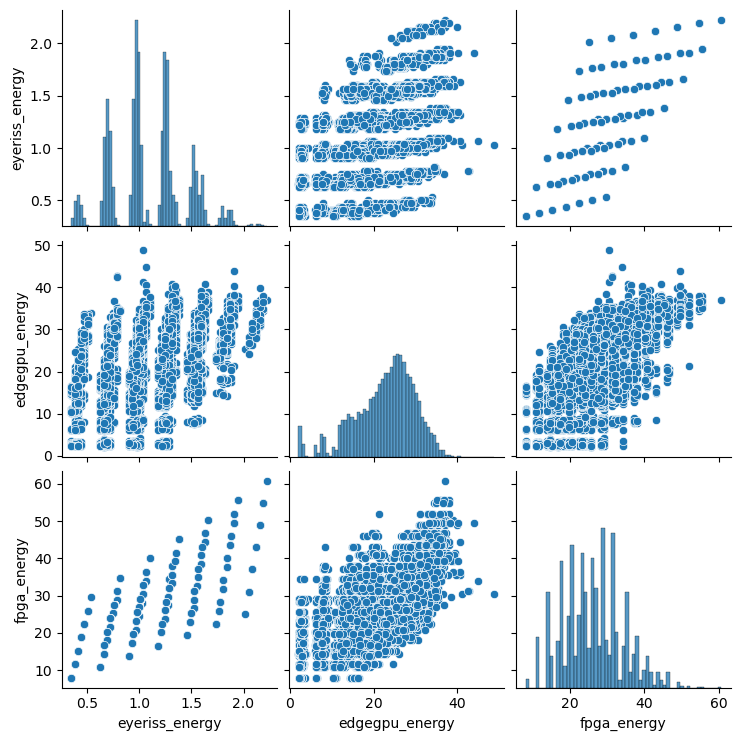

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[energies])

In [8]:
X = df[proxies]
Y = df[energies]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [10]:
def train_and_test(X_train, Y_train, X_test, Y_test, what="accuracy"):
    Y1_train = Y_train[what]
    Y1_test = Y_test[what]

    if MODEL == "XGBRegressor":
        print("Using XGBoost.")
        model = XGBRegressor()
    elif MODEL == "DTREE":
        print("Using Random Forest.")
        model = RandomForestRegressor()
    else:
        raise ValueError("Unknown model type.")
        
    model.fit(X_train, Y1_train)
    
    Y1_pred = model.predict(X_test)
    score = r2_score(Y1_test, Y1_pred)
    
    feature_importances = {
        col: imp
        for col, imp in zip(X_train.columns, model.feature_importances_)
    }
    
    return score, feature_importances 

In [ ]:
energy_scores = {}
energy_importances = []

for run in range(100):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=TRAIN_SIZE)
    energy_score, energy_feature_importances = train_and_test(X_train, Y_train, X_test, Y_test, what=f"{DEVICE}_energy")
   
    energy_scores[run] = energy_score
    energy_importances.append(energy_feature_importances)
    if run % 10 == 0:
        print(run)

print("Done.")


Using Random Forest.
0
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
10
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
20
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
30
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
40
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.
Using Random Forest.

In [ ]:
#energy_scores
df_score = pd.DataFrame(energy_scores, index=["r2_score"]).T
#df_score.describe().loc[["mean", "std"]]
df_score.describe().loc[["mean", "std"]]

In [ ]:
R2 = df_score.describe().loc["mean", "r2_score"]

In [ ]:
df_energy_importance = pd.DataFrame(energy_importances)
df_energy_importance.describe().loc[["mean", "std"]].T.sort_values(by="mean", ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(df_energy_importance, ax=ax)
ax.set_title(f"Feature importances - prediction {DEVICE} energy (test_size {TRAIN_SIZE}, {MODEL}, r2_score {R2})")
plt.savefig(f"{DEVICE}_{TRAIN_SIZE}_{MODEL}_energy_prediction.png", bbox_inches="tight")